In [489]:
import pandas as pd #manejo y analisis de estructuras de datos 
import numpy as np #calculo numerico y analisis de datos 
import seaborn as sns #creacion de  graficos estadisiticos
import matplotlib.pyplot as plt #creacion de  graficos en 2 dimensiones
import seaborn as sns
#librerias para  imprementar  modelos de ciencia de datos
#librerias para  imprementar  modelos de ciencia de datos
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [491]:
Datos = pd.read_csv('C:/Users/PC/Desktop/data/Anexo 6 - Dataset Titanic/Titanic-Dataset.csv')
Datos.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# sobre el dataset
### dataset de los sobrevivientes del titanic
* PassengerId = id del pasajero [*variable a descartar el id no  ayuda a sobrevivir*\]
* Survived = el pasajero sobrevivio [**variable objetivo**\]
* Pclass = classe en la que viajava el pasajero
* Name = nombre del pasajero [*variable a descartar el nombre no  ayuda a sobrevivir*\] 
* Sex = sexo del pasajero
* Age = edad del pasajero
* SibSp = numero de  hermanos o esposas a bordo del titanic
* Parch = numero de  padres o hijos a bordo del titanic
* Ticket = numeor del ticket [*tambien para descartar  el numero de ticket no ayuda a sobrevivir*\]
* Fare = precio del viaje del pasajero
* cabin = cabina en la que se hospeda el pasajero
* Embarked = puerto donde se  subio  el pasajero

In [494]:
Datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Cabin tiene muchos nulos  alrededor del 70% se descarta la columna para el analisis

In [497]:
Datos.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [499]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [501]:
Datos.shape

(891, 12)

In [503]:
Datos['Age'].isna().sum()

177

# Edad
* la idea es ver si se toma la media o la mediana para  quitar los valores  nul

In [506]:
Datos['Age'].mean()

29.69911764705882

In [508]:
Datos['Age'].median()

28.0

AttributeError: module 'matplotlib.pyplot' has no attribute 'tittle'

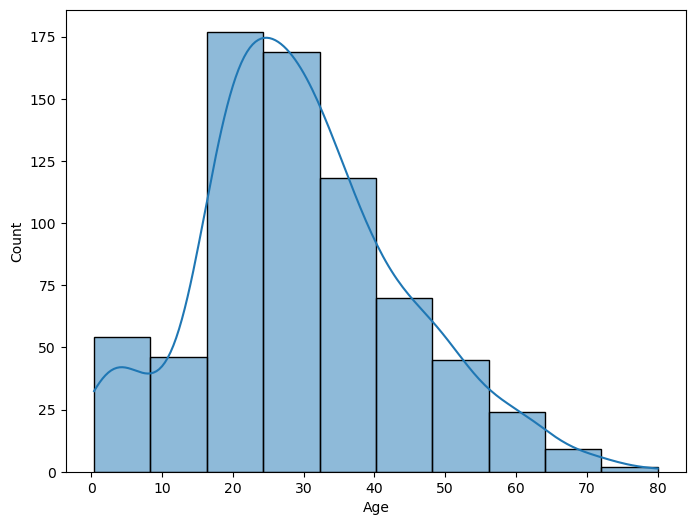

In [510]:
plt.figure(figsize=(8,6))
sns.histplot(Datos['Age'], bins = 10 , kde= True)
plt.tittle('distribucion de la edad de los  pasajeros')
plt.xlabel('Edad')
plt.lyabel('Numero de Pasajeros')
plt.show()

* como no es una distribuicon normal se  toma la moda 

In [513]:
Datos['Age'] = Datos['Age'].fillna(Datos['Age'].median())

In [515]:
Datos['Age'].isna().sum()

0

In [517]:
Datos['Embarked'].isna().sum()

2

In [519]:
Datos['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Embarked
* la  idea es ver si se  marca una tendencia en la variable para usar la moda  o si esta distribuido equitativamente entre las categorias hacer una categoria nueva 

AttributeError: module 'matplotlib.pyplot' has no attribute 'tittle'

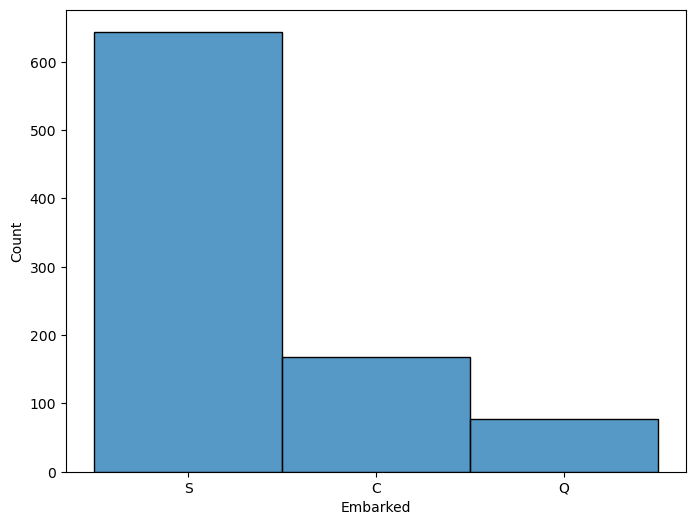

In [522]:
plt.figure(figsize=(8,6))
sns.histplot(Datos['Embarked'], bins = 10 , kde= False)
plt.tittle('distribucion de laciudad donde enbarcaron los  pasajeros ')
plt.xlabel('Ciudad')
plt.lyabel('Numero de Pasajeros que enbarcaron')
plt.show()

* se toma la moda

In [525]:
mode = Datos['Embarked'].mode().values[0]
Datos['Embarked'].fillna(value=mode, inplace=True)

In [527]:
Datos['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [529]:
# eliminamos comlumnas que no se necesitan
Datos = Datos[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [531]:
Datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [533]:
label_encoder = preprocessing.LabelEncoder()
Datos['Sex'] = label_encoder.fit_transform(Datos['Sex'])

In [535]:
Datos['Sex'].unique()

array([1, 0])

In [537]:
label_encoder = preprocessing.LabelEncoder()
Datos['Embarked'] = label_encoder.fit_transform(Datos['Embarked'])

In [539]:
Datos['Embarked'].unique()

array([2, 0, 1])

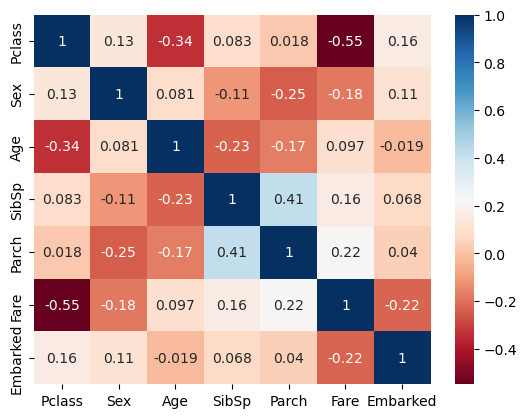

In [541]:
sns.heatmap(Datos.drop('Survived',axis=1).corr(), annot=True, cmap="RdBu")
plt.show()

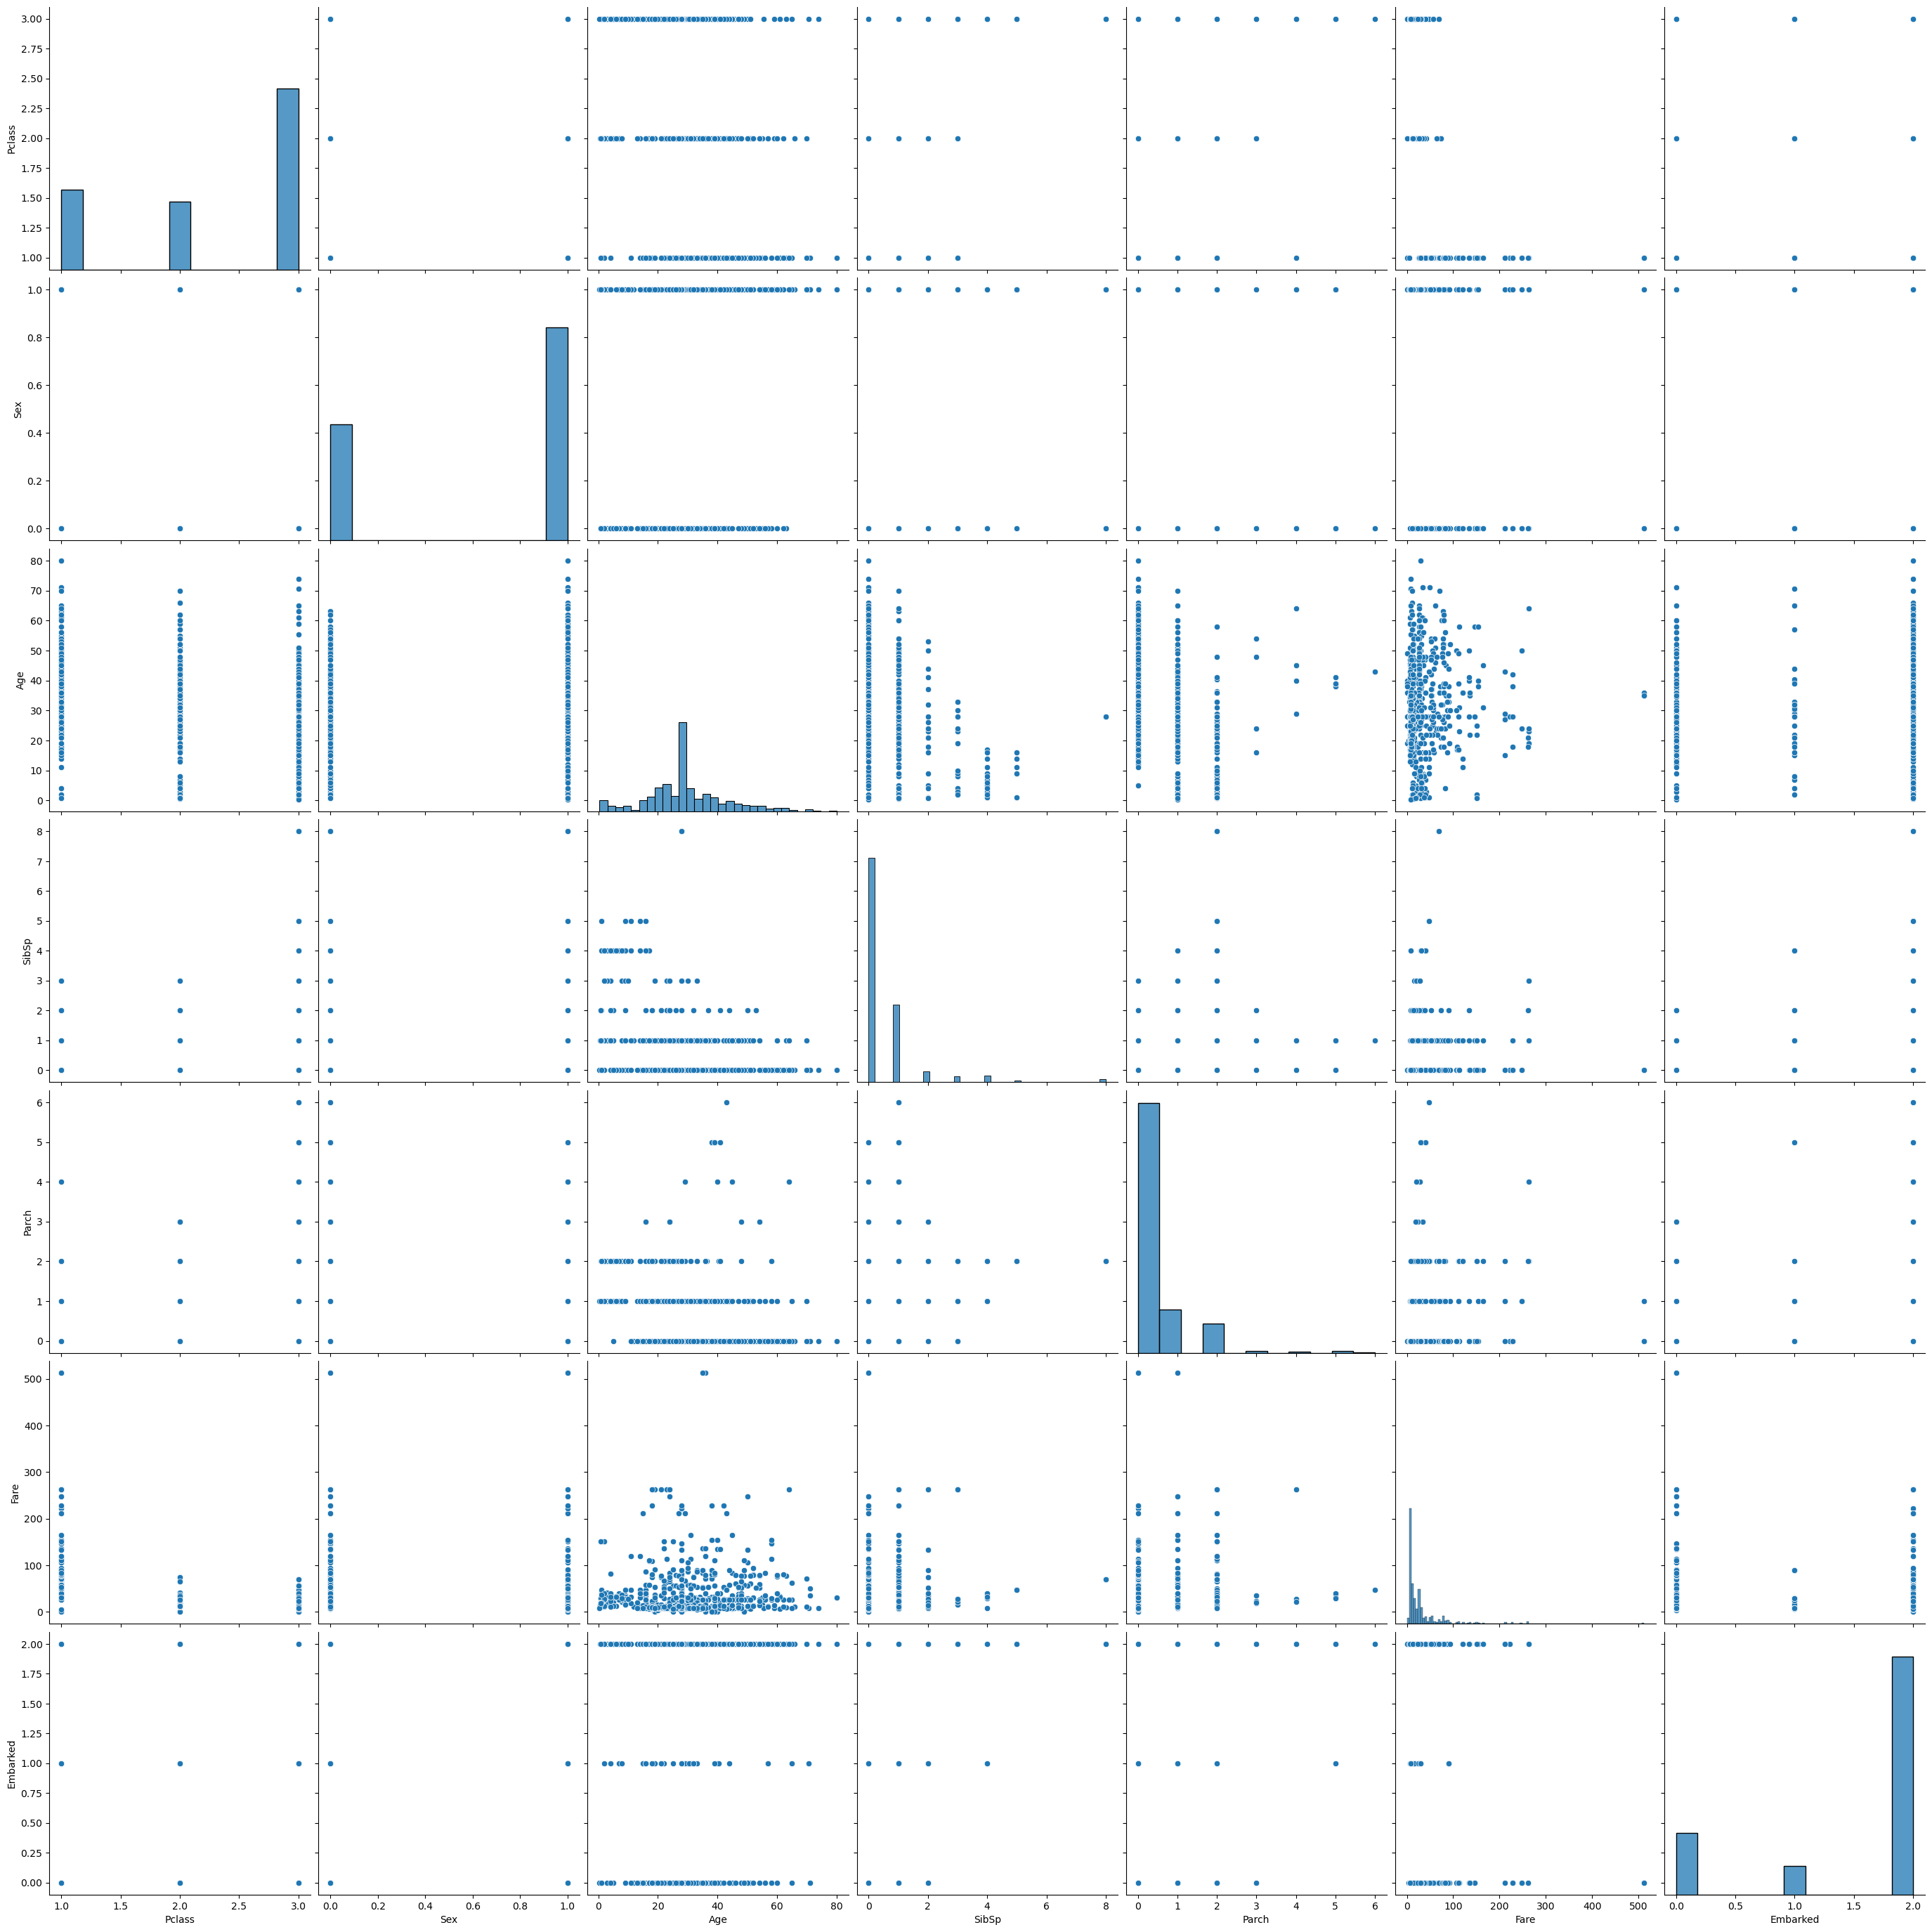

In [543]:
sns.pairplot(Datos.drop('Survived',axis=1).dropna(),size=4,kind='scatter')

In [559]:
X = Datos.drop('Survived',axis=1) # se  cargan los datos de train sin los datos de la columna survived
Y = Datos['Survived'] # se cargan los datos de train con los datos de la columna survived



X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,stratify=Y,random_state =0)


In [545]:
print(X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
671       1    1  31.0      1      0  52.0000         2
417       2    0  18.0      0      2  13.0000         2
634       3    0   9.0      3      2  27.9000         2
323       2    0  22.0      1      1  29.0000         2
379       3    1  19.0      0      0   7.7750         2
..      ...  ...   ...    ...    ...      ...       ...
131       3    1  20.0      0      0   7.0500         2
490       3    1  28.0      1      0  19.9667         2
528       3    1  39.0      0      0   7.9250         2
48        3    1  28.0      2      0  21.6792         0
80        3    1  22.0      0      0   9.0000         2

[668 rows x 7 columns]


In [549]:
print(Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


In [561]:
modelo_regresion = LogisticRegression(solver = "liblinear") # libilinear  es una  libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion.fit(X_train,Y_train)

#crea el modelo de  prediccion
Prediccion = modelo_regresion.predict(X_test) # la funcion predict predice los valores a partir del conjunto de datos de validacion

In [565]:
Prediccion

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [567]:
print(metrics.classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       137
           1       0.77      0.64      0.70        86

    accuracy                           0.79       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.79      0.79      0.78       223



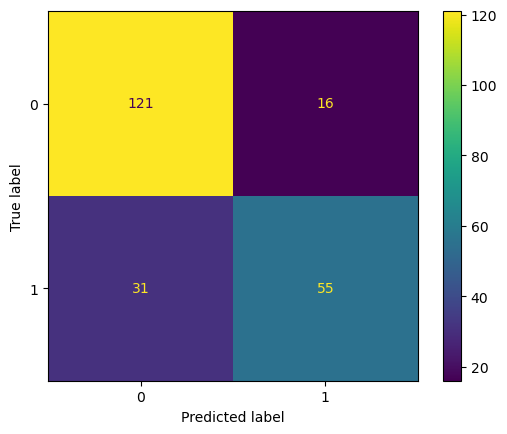

In [569]:
cm=metrics.confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

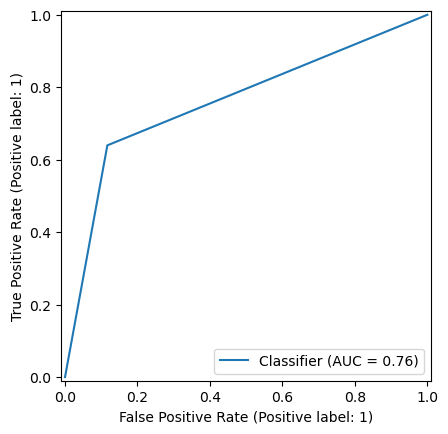

In [571]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test,Prediccion)
plt.show()

## del desempeño del modelo se puede describir:

* Presicion:Presicion mide la proporcion de predicicones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo.Aqui la precicion para la clase "Survived" es de 0.79, lo que significa que el 79% de los predichos como sobrevivientes  sovreviviria al accidente del titanic.
  
* Recall: mide la proporcion de predicciones positivas verdaderas entre todas las instancias positivasreales en el conjunto de datos. Aqui en el recall para la clase Survived es 0.76, lo que indica que el modelo identifico correctamente al 76% de todos los sobrevivientes

* F1 score: es la media armonica de precision y recuperacion. Proporciona una puntuaicon unica que equilibra la precicion y Recall. Aqui la puntuacion F1 para la clase "Survived" es 0.79 lo que indica un equilibrio entre precicion y recuerdo

De la matrix de confucion podemos interpretar:

* Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso: 121
  
* verdaderos positivos: el recuento de obserbaciones que un clasificador predijo correctamente como verdadero: 55
  
* Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdadreras: 16
  
* Falsos negativos:el recuento de observaciones que un clasificador predijo incorrectamente como falso: 31

De la curva de precision del modelo se puede interpretar:

*  El AUC es 0.76 lo que significa que el 76% de las predicciones del clasificador son correctas en todos los umbrales de clasificacion.